In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
from matplotlib import dates
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [2]:
def format_data(data):
    if (type(data) == str) :
        if (data == ' ') :
            return np.nan
        else :
            return np.float64(data)
    else :
        return data

In [3]:
def s_to_ns(x):
    return x/1.0e-9

In [4]:
df = pd.read_csv('./reference_waveforms/UniGe_VS_Model.csv')

In [5]:
####################################
# model00 : L = 5.0e-09   R =  5.0 #
# model01 : L = 1.0e-08   R =  5.0 #
# model02 : L = 1.0e-08   R = 10.0 #
# model03 : L = 1.0e-08   R = 15.0 #
# model04 : L = 2.5e-08   R = 50.0 #
# FBKUN00 : L = 5.0e-09   R =  5.0 #
####################################

In [6]:
df.rename(columns={'leafValue( (VT("/model") / ymax(VT("/model"))) "Lpar" 5e-09 "Rpar" 5 ) (V)'        :'model00',
                   'leafValue( (VT("/model") / ymax(VT("/model"))) "Lpar" 1e-08 "Rpar" 5 ) (V)'        :'model01',
                   'leafValue( (VT("/model") / ymax(VT("/model"))) "Lpar" 1e-08 "Rpar" 10 ) (V)'       :'model02',
                   'leafValue( (VT("/model") / ymax(VT("/model"))) "Lpar" 1e-08 "Rpar" 15 ) (V)'       :'model03',
                   'leafValue( (VT("/model") / ymax(VT("/model"))) "Lpar" 2.5e-08 "Rpar" 50 ) (V)'     :'model04',
                   'leafValue((VT("/FBK_UniGe") / ymax(VT("/FBK_UniGe"))) "Lpar" 5e-09 "Rpar" 5.0) (V)':'FBKUN00'},
          inplace=True)

In [7]:
df.rename(columns={'time (s)'   :'time_s_00',
                   'time (s).1' :'time_s_01',
                   'time (s).2' :'time_s_02',
                   'time (s).3' :'time_s_03',
                   'time (s).4' :'time_s_04',
                   'time (s).5' :'time_s_05'},
          inplace=True)

In [8]:
for x in df.columns :
     df[x]=df[x].map(format_data) 

In [9]:
df.describe()

time_s_00       model00     time_s_01       model01     time_s_02  \
count  2.192200e+04  21922.000000  2.193200e+04  21932.000000  2.192100e+04   
mean   7.507622e-07      0.003578  7.505395e-07      0.003648  7.507857e-07   
std    3.798342e-07      0.027118  3.798582e-07      0.029402  3.798404e-07   
min    0.000000e+00      0.000004  0.000000e+00      0.000004  0.000000e+00   
25%    4.851074e-07      0.000004  4.848648e-07      0.000004  4.851602e-07   
50%    6.887234e-07      0.000005  6.884845e-07      0.000005  6.888412e-07   
75%    1.030992e-06      0.000277  1.030958e-06      0.000277  1.030998e-06   
max    5.000000e-06      1.000000  5.000000e-06      1.000000  5.000000e-06   

            model02     time_s_03       model03     time_s_04       model04  \
count  21921.000000  2.193400e+04  21934.000000  2.193900e+04  21939.000000   
mean       0.003898  7.506848e-07      0.004320  7.507692e-07      0.006397   
std        0.029673  3.797905e-07      0.031852  3.797401e-07      0.039584   
min        0.000005  0.000000e+00      0.000005  0.000000e+00      0.000008   
25%        0.000005  4.850570e-07      0.000005  4.851206e-07      0.000008   
50%        0.000006  6.887941e-07      0.000006  6.888671e-07      0.000010   
75%        0.000312  1.030956e-06      0.000355  1.030953e-06      0.000684   
max        1.000000  5.000000e-06      1.000000  5.000000e-06      1.000000   

          time_s_05       FBKUN00  
count  2.192200e+04  21922.000000  
mean   7.507622e-07      0.006748  
std    3.798342e-07      0.044975  
min    0.000000e+00     -0.001901  
25%    4.851074e-07      0.001179  
50%    6.887234e-07      0.001179  
75%    1.030992e-06      0.001684  
max    5.000000e-06      1.000000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21939 entries, 0 to 21938
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time_s_00  21922 non-null  float64
 1   model00    21922 non-null  float64
 2   time_s_01  21932 non-null  float64
 3   model01    21932 non-null  float64
 4   time_s_02  21921 non-null  float64
 5   model02    21921 non-null  float64
 6   time_s_03  21934 non-null  float64
 7   model03    21934 non-null  float64
 8   time_s_04  21939 non-null  float64
 9   model04    21939 non-null  float64
 10  time_s_05  21922 non-null  float64
 11  FBKUN00    21922 non-null  float64
dtypes: float64(12)
memory usage: 2.0 MB


In [11]:
df_model00=df.copy(deep=True)
df_model01=df.copy(deep=True)
df_model02=df.copy(deep=True)
df_model03=df.copy(deep=True)
df_model04=df.copy(deep=True)
df_FBKUN00=df.copy(deep=True)

In [12]:
df_model00=df_model00[['time_s_00','model00']]
df_model01=df_model01[['time_s_01','model01']]
df_model02=df_model02[['time_s_02','model02']]
df_model03=df_model03[['time_s_03','model03']]
df_model04=df_model04[['time_s_04','model04']]
df_FBKUN00=df_FBKUN00[['time_s_05','FBKUN00']]

In [13]:
df_model00.set_index('time_s_00',inplace=True)
df_model01.set_index('time_s_01',inplace=True)
df_model02.set_index('time_s_02',inplace=True)
df_model03.set_index('time_s_03',inplace=True)
df_model04.set_index('time_s_04',inplace=True)
df_FBKUN00.set_index('time_s_05',inplace=True)

In [14]:
df_model00.dropna(inplace=True)
df_model01.dropna(inplace=True)
df_model02.dropna(inplace=True)
df_model03.dropna(inplace=True)
df_model04.dropna(inplace=True)
df_FBKUN00.dropna(inplace=True)

In [15]:
df_model00['time_ns_00']=df_model00.index.map(s_to_ns)
df_model01['time_ns_01']=df_model01.index.map(s_to_ns)
df_model02['time_ns_02']=df_model02.index.map(s_to_ns)
df_model03['time_ns_03']=df_model03.index.map(s_to_ns)
df_model04['time_ns_04']=df_model04.index.map(s_to_ns)
df_FBKUN00['time_ns_05']=df_FBKUN00.index.map(s_to_ns)

In [16]:
df_model00.set_index('time_ns_00',inplace=True)
df_model01.set_index('time_ns_01',inplace=True)
df_model02.set_index('time_ns_02',inplace=True)
df_model03.set_index('time_ns_03',inplace=True)
df_model04.set_index('time_ns_04',inplace=True)
df_FBKUN00.set_index('time_ns_05',inplace=True)

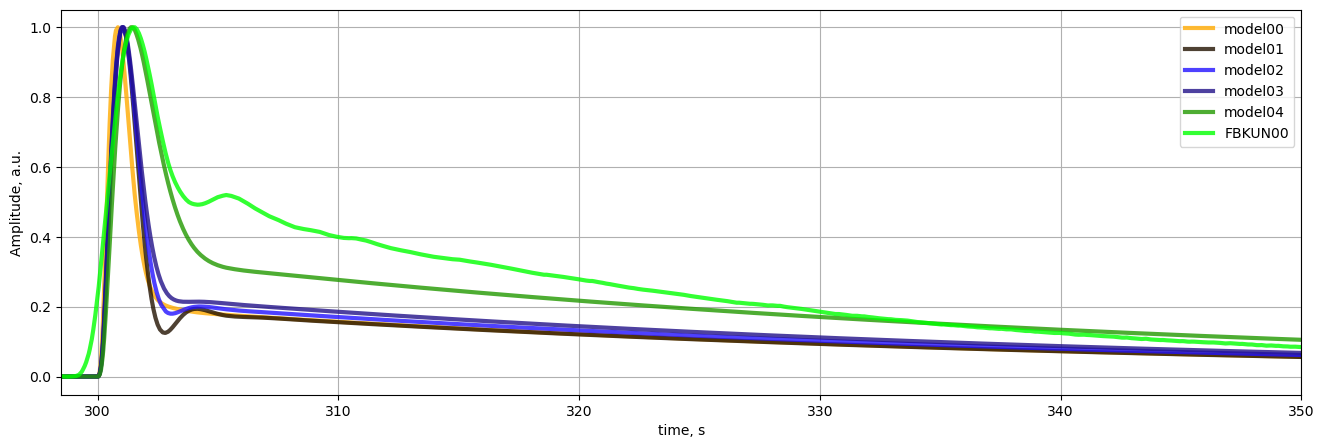

In [17]:
xlim=(298.5,350)
ax=df_model00.plot( alpha=0.8, figsize=(16,5), xlim=xlim,c='#FFAA00',linewidth=3);
df_model01.plot(ax=ax, alpha=0.8,c='#221100',linewidth=3);
df_model02.plot(ax=ax, alpha=0.8,c='#2211FF',linewidth=3);
df_model03.plot(ax=ax, alpha=0.8,c='#221188',linewidth=3);
df_model04.plot(ax=ax, alpha=0.8,c='#229900',linewidth=3);
df_FBKUN00.plot(ax=ax, alpha=0.8,c='#00FF00',linewidth=3);
ax.set(xlabel='time, s',ylabel='Amplitude, a.u.');
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [18]:
df_model00.to_csv('FBK_FBKampl_25um_Lpar5e-09R5.csv',sep=' ',header=False)
df_model01.to_csv('FBK_FBKampl_25um_Lpar5e-08R5.csv',sep=' ',header=False)
df_model02.to_csv('FBK_FBKampl_25um_Lpar5e-08R10.csv',sep=' ',header=False)
df_model03.to_csv('FBK_FBKampl_25um_Lpar5e-08R15.csv',sep=' ',header=False)
df_model04.to_csv('FBK_FBKampl_25um_Lpar2.5e-08R50.csv',sep=' ',header=False)
df_FBKUN00.to_csv('FBK_FBKampl_25um_measurements.csv',sep=' ',header=False)